<a href="https://colab.research.google.com/github/rafae1franco/BreastCancer_evaluate/blob/main/Alzheimer_Project_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from google.colab import drive
import zipfile
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_path = '/content/drive/MyDrive/I.A/dataset-Alzheimer.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')
    os.listdir('/content/dataset')

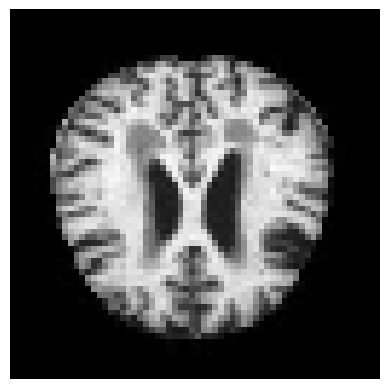

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

image_path = '/content/dataset/Dataset/Mild_Demented/mild_172.jpg'

img = image.load_img(image_path, target_size=(64, 64))

img_array = image.img_to_array(img)

plt.imshow(img_array.astype('uint8'))
plt.axis('off')
plt.show()

In [5]:
data = '/content/dataset/Dataset'

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data,
    target_size=(64, 64),
    batch_size=32,
    class_mode=('categorical')
)

test_generator = datagen.flow_from_directory(
    data,
    target_size=(64, 64),
    batch_size=32,
    class_mode=('categorical')
)

Found 6400 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


In [7]:
model = Sequential([

    Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(4, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(
    train_generator,
    epochs= 5,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 68s 321ms/step - accuracy: 0.4692 - loss: 1.0844 - val_accuracy: 0.5442 - val_loss: 0.9641
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 59s 294ms/step - accuracy: 0.5397 - loss: 0.9547 - val_accuracy: 0.5605 - val_loss: 0.9126
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 59s 294ms/step - accuracy: 0.5472 - loss: 0.9283 - val_accuracy: 0.5745 - val_loss: 0.9007
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 58s 290ms/step - accuracy: 0.5688 - loss: 0.8859 - val_accuracy: 0.5858 - val_loss: 0.8662
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 58s 290ms/step - accuracy: 0.5705 - loss: 0.8840 - val_accuracy: 0.5814 - val_loss: 0.8375


In [9]:

loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f'Test accuracy: {accuracy * 100:.2f}%')

200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.5910 - loss: 0.8284
Test accuracy: 58.58%


200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step


<Figure size 2000x800 with 0 Axes>

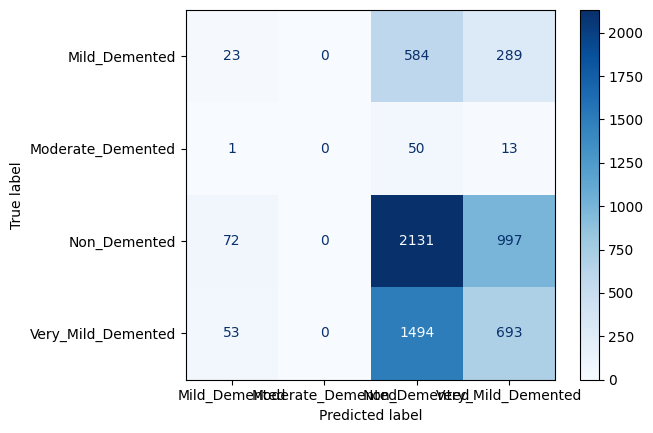

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtendo as previsões do modelo
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertendo as previsões para rótulos de classe

# Obtendo os rótulos reais
y_true = test_generator.classes  # Rótulos verdadeiros
class_labels = list(test_generator.class_indices.keys())  # Nomes das classes

# Calculando a matriz de confusão
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Ajustando o tamanho do gráfico
plt.figure(figsize=(20, 8))  # Aumente o tamanho conforme necessário

# Exibindo a matriz de confusão
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()


200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step


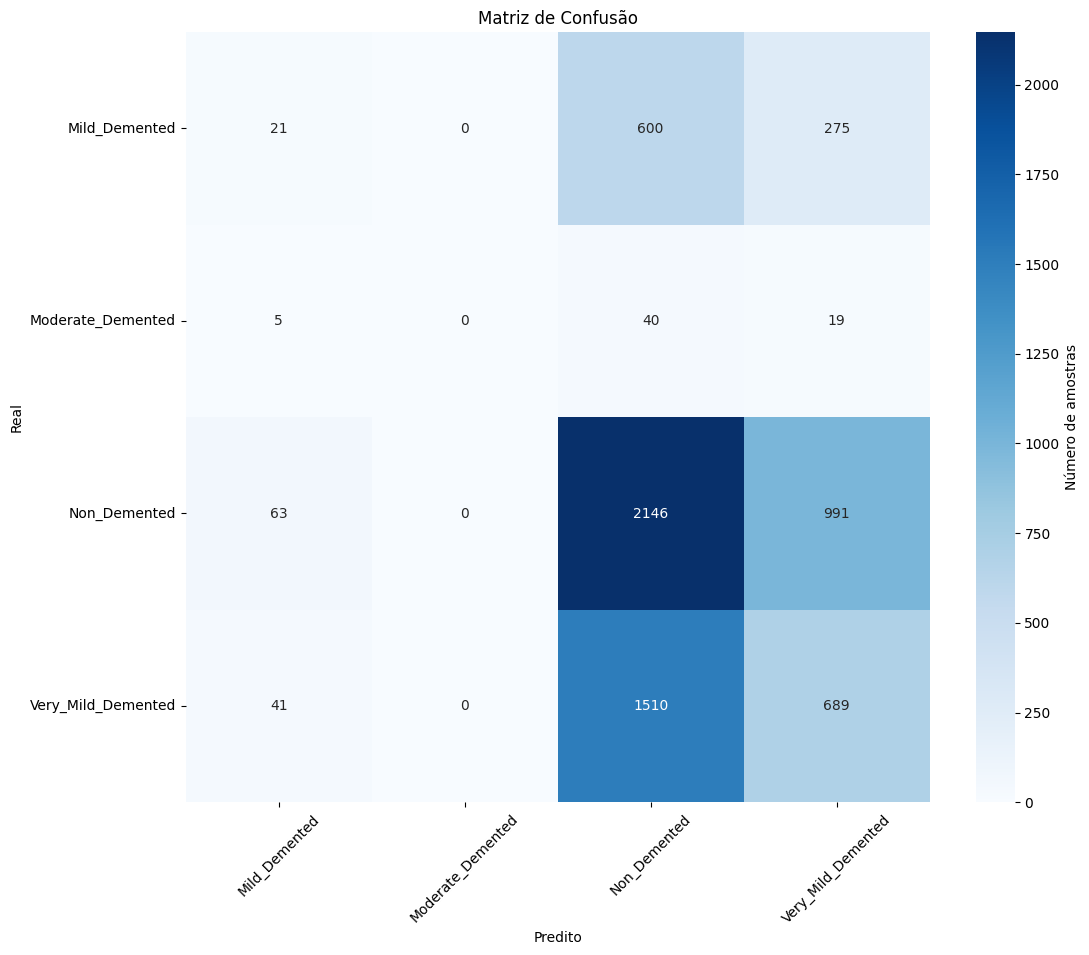

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtendo as previsões do modelo
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertendo as previsões para rótulos de classe

# Obtendo os rótulos reais
y_true = test_generator.classes  # Rótulos verdadeiros
class_labels = list(test_generator.class_indices.keys())  # Nomes das classes

# Calculando a matriz de confusão
cm = confusion_matrix(y_true, y_pred_classes)

# Ajustando o tamanho do gráfico
plt.figure(figsize=(12, 10))  # Ajuste o tamanho conforme necessário

# Criando o heatmap com Seaborn
sns.heatmap(cm,
            annot=True,            # Adiciona os valores das células
            fmt='d',               # Formata os valores das células como inteiros
            cmap='Blues',          # Mapa de cores
            xticklabels=class_labels,
            yticklabels=class_labels,
            cbar_kws={'label': 'Número de amostras'})  # Rótulo da barra de cores

# Ajuste do espaçamento dos rótulos para evitar sobreposição
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo x
plt.yticks(rotation=0)   # Mantém os rótulos no eixo y na horizontal

plt.show()


In [12]:
def classify_image(model, img_path, target_size=(64, 64)):
    # Carregar e processar a imagem
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Fazer a predição
    prediction = model.predict(img_array)

    # Identificar a classe com maior probabilidade
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[predicted_class_index]

    # Exibir a imagem com a classe prevista
    plt.imshow(image.load_img(img_path))
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

    return predicted_class


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


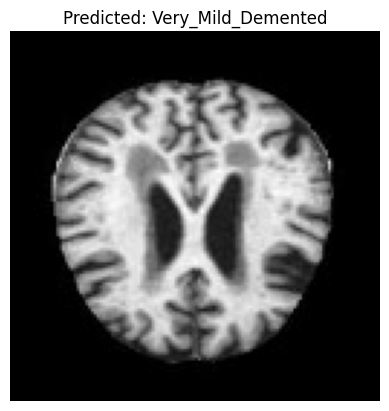

The image is classified as: Very_Mild_Demented


In [13]:
import os

# Caminho da imagem para classificação
img_path = '/content/dataset/Dataset/Mild_Demented/mild_172.jpg'

# Verifique se o arquivo existe
if os.path.exists(img_path):
    # Função de classificação de imagem
    predicted_class = classify_image(model, img_path)
    print(f'The image is classified as: {predicted_class}')
else:
    print(f"File not found: {img_path}")
    # Exibe os arquivos no diretório para ajudar na depuração
    test_dir = '/content/dataset/test_set/Mild_Demented/'
    print(f"Files in the directory '{test_dir}':")
    print(os.listdir(test_dir))
